# Callback api

Вконтакт умеет самостоятельно высылать все события происходящие в группе посредством `callback api`

- https://vk.com/dev/callback_api
- https://vk.com/dev/groups_events

В данном документе собран пример обработки этих данных


# Описание выгрузки

- events_statistics.csv - посуточная статистика, по всем событиям
- events_moderator.csv - посуточная статистика по действия модератора/группы
- events_users.cs - посуточная статистика по действия мпользователей
- moderation_delete_stat.csv - данные по удалению комментариев
- moderation_delete_meantime.csv - среднее время до удаления
- moderation_response_stat.csv - данные по ответам на комментарии модератором / группой
- moderation_response_meantime.csv - среднее время до отевта модератором / группой

## Загрузка базы событий

In [1]:
import matplotlib as plt
import pandas as pd
import numpy as np

In [2]:
# очистка статистки
!rm fanta/*

In [3]:
moderator_id = 13503331
group_id = -24539231

events_txt = {'message_new': 'входящее сообщение', 'message_reply': 'новое исходящее сообщение', 'message_edit': 'редактирование сообщения', 'message_allow': 'подписка на сообщения от сообщества', 'message_deny': 'новый запрет сообщений от сообщества', 'photo_new': 'добавление фотографии', 'photo_comment_new': 'добавление комментария к фотографии', 'photo_comment_edit': 'редактирование комментария к фотографии', 'photo_comment_restore': 'восстановление комментария к фотографии', 'photo_comment_delete': 'удаление комментария к фотографии', 'audio_new': 'добавление аудио', 'video_new': 'добавление видео', 'video_comment_new': 'комментарий к видео', 'video_comment_edit': 'редактирование комментария к видео', 'video_comment_restore': 'восстановление комментария к видео', 'video_comment_delete': 'удаление комментария к видео', 'wall_post_new': 'запись на стене', 'wall_repost': 'репост записи из сообщества', 'wall_reply_new': 'добавление комментария на стене', 'wall_reply_edit': 'редактирование комментария на стене', 'wall_reply_restore': 'восстановление комментария на стене', 'wall_reply_delete': 'удаление комментария на стене', 'board_post_new': 'создание комментария в обсуждении', 'board_post_edit': 'редактирование комментария', 'board_post_restore': 'восстановление комментария', 'board_post_delete': 'удаление комментария в обсуждении', 'market_comment_new': 'новый комментарий к товару', 'market_comment_edit': 'редактирование комментария к товару', 'market_comment_restore': 'восстановление комментария к товару', 'market_comment_delete': 'удаление комментария к товару', 'group_leave': 'удаление участника из сообщества', 'group_join': 'добавление участника или заявки на вступление в сообщество', 'user_block': 'добавление пользователя в чёрный список', 'user_unblock': 'удаление пользователя из чёрного списка', 'poll_vote_new': 'добавление голоса в публичном опросе', 'group_officers_edit': 'редактирование списка руководителей'}

In [4]:
import sqlite3
from pandas.io.json  import json_normalize
import json

# забираем базу
db = sqlite3.connect('file:/home/v.seregin/lab/fanta/database.sqlite?mode=ro', uri=True)
df = pd.read_sql_query('select * from event', db)
df['date'] = pd.to_datetime(df['date'])
df['object'] = df['object'].apply(json.loads)
df['from_id'] = df['object'].apply(lambda x: x.get('from_id',np.nan)).astype(pd.Int64Dtype())
df

id   group_id            type                       date  \
0          1  181741210  wall_reply_new 2019-09-28 16:26:46.508471   
1          2  181741210  wall_reply_new 2019-09-28 16:31:52.345462   
2          3   24539231     message_new 2019-09-28 18:00:01.024108   
3          4   24539231     message_new 2019-09-28 18:01:39.427268   
4          5   24539231  wall_reply_new 2019-09-28 18:02:10.980445   
...      ...        ...             ...                        ...   
75590  75591   24539231      group_join 2019-11-07 14:41:49.294970   
75591  75592   24539231      group_join 2019-11-07 14:42:17.045110   
75592  75593   24539231     group_leave 2019-11-07 14:42:22.021598   
75593  75594   24539231     message_new 2019-11-07 14:42:33.620959   
75594  75595   24539231      group_join 2019-11-07 14:43:11.935461   

                                                  object    from_id  
0      {'id': 39, 'from_id': 542380738, 'date': 15696...  542380738  
1      {'id': 34, 'from_id': 542380738, 'date': 15696...  542380738  
2      {'id': 494346, 'date': 1569693600, 'out': 0, '...        NaN  
3      {'id': 494347, 'date': 1569693699, 'out': 0, '...        NaN  
4      {'id': 263514, 'from_id': 64237711, 'date': 15...   64237711  
...                                                  ...        ...  
75590        {'user_id': 552953951, 'join_type': 'join'}        NaN  
75591        {'user_id': 226261179, 'join_type': 'join'}        NaN  
75592                  {'user_id': 226261179, 'self': 1}        NaN  
75593  {'id': 527408, 'date': 1573137753, 'out': 0, '...        NaN  
75594        {'user_id': 416842775, 'join_type': 'join'}        NaN  

[75595 rows x 6 columns]

## Общая постуточная статистика по событиям

In [5]:
df_stat = df[['type','id']].groupby([df.date.dt.date, 'type']).agg('count')
df_stat.columns = ["Общая посуточная статистика пользователи + модераторы"]
df_stat.to_csv("fanta/events_statistics.csv")
df_stat

Общая посуточная статистика пользователи + модераторы
date       type                                                                    
2019-09-28 group_join                                                        28    
           group_leave                                                       21    
           message_allow                                                      4    
           message_deny                                                       1    
           message_new                                                       21    
...                                                                         ...    
2019-11-07 message_new                                                      156    
           message_reply                                                    282    
           photo_comment_new                                                  1    
           wall_reply_delete                                                  4    
           wall_reply_new                                                     7    

[496 rows x 1 columns]

## Постуточная статистика по событиям от модератора

In [6]:
df_stat = df[(df["from_id"]==moderator_id) | (df["from_id"]==group_id)][['type','id']].groupby([df.date.dt.date, 'type']).agg('count')
df_stat.columns = ["Ко-во событий от имени модератора / группы"]
df_stat.to_csv("fanta/events_moderator.csv")
df_stat.head(10)

Ко-во событий от имени модератора / группы
date       type                                                          
2019-09-29 wall_reply_new                                               8
2019-09-30 wall_reply_new                                               3
2019-10-01 wall_reply_new                                               8
2019-10-02 wall_reply_new                                              13
2019-10-03 message_reply                                                2
           wall_reply_new                                               9
2019-10-04 wall_reply_edit                                              1
           wall_reply_new                                               2
           wall_reply_restore                                           1
2019-10-05 wall_reply_new                                               2

## Постуточная статистика по событиям от прочих участников

In [7]:
df_stat = df[(df["from_id"]!=group_id) & (df["from_id"]!=moderator_id)][['type','id']].groupby([df.date.dt.date, 'type']).agg('count')
df_stat.columns = ["Ко-во событий"]
df_stat.to_csv("fanta/events_users.csv")
df_stat.head(20)

Ко-во событий
date       type                            
2019-09-28 group_join                    28
           group_leave                   21
           message_allow                  4
           message_deny                   1
           message_new                   21
           message_reply                  4
           wall_reply_delete              4
           wall_reply_new                 7
2019-09-29 group_join                   708
           group_leave                  198
           message_allow                  7
           message_deny                   1
           message_edit                   1
           message_new                  139
           message_reply                 16
           photo_comment_new              1
           user_unblock                   1
           wall_reply_delete              8
           wall_reply_edit                1
           wall_reply_new                27

In [8]:
for event in df_stat.index.get_level_values(1).unique().values:
    df_event = df_stat.xs(event, level=1)
    idx = pd.date_range(df_stat.index[0][0], df_stat.index[-1][0])
    df_event = df_event.reindex(idx, fill_value=0)
    df_event.columns = (f"{events_txt.get(event, event)} ({event})",)
    df_event.plot(figsize=(20,10)).get_figure().savefig(f"fanta/{event}.png")

/home/v.seregin/lab/jupyter/venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


## Обработка событий

In [9]:
# id ответа
df['reply_id'] = df[df.type.isin(['wall_reply_new', 'wall_reply_delete'])]['object'].apply(lambda x: x['id']).astype(pd.Int64Dtype())
df['deleter_id'] = df[df.type == 'wall_reply_delete']['object'].apply(lambda x: x['deleter_id']).astype(pd.Int64Dtype())
df
# df['from_id'] = df['object'].apply(lambda x: int(x.get('from_id', 0)))
# df['user_id'] = df['object'].apply(lambda x: int(x.get('user_id', 0)))
# df['deleter_id'] = df['object'].apply(lambda x: int(x.get('deleter_id', 0)))
# df['post_id'] = df['object'].apply(lambda x: int(x.get('post_id', 0)))
# df['comment_id'] = df['object'].apply(lambda x: x.get('id',0))

id   group_id            type                       date  \
0          1  181741210  wall_reply_new 2019-09-28 16:26:46.508471   
1          2  181741210  wall_reply_new 2019-09-28 16:31:52.345462   
2          3   24539231     message_new 2019-09-28 18:00:01.024108   
3          4   24539231     message_new 2019-09-28 18:01:39.427268   
4          5   24539231  wall_reply_new 2019-09-28 18:02:10.980445   
...      ...        ...             ...                        ...   
75590  75591   24539231      group_join 2019-11-07 14:41:49.294970   
75591  75592   24539231      group_join 2019-11-07 14:42:17.045110   
75592  75593   24539231     group_leave 2019-11-07 14:42:22.021598   
75593  75594   24539231     message_new 2019-11-07 14:42:33.620959   
75594  75595   24539231      group_join 2019-11-07 14:43:11.935461   

                                                  object    from_id  reply_id  \
0      {'id': 39, 'from_id': 542380738, 'date': 15696...  542380738        39   
1      {'id': 34, 'from_id': 542380738, 'date': 15696...  542380738        34   
2      {'id': 494346, 'date': 1569693600, 'out': 0, '...        NaN       NaN   
3      {'id': 494347, 'date': 1569693699, 'out': 0, '...        NaN       NaN   
4      {'id': 263514, 'from_id': 64237711, 'date': 15...   64237711    263514   
...                                                  ...        ...       ...   
75590        {'user_id': 552953951, 'join_type': 'join'}        NaN       NaN   
75591        {'user_id': 226261179, 'join_type': 'join'}        NaN       NaN   
75592                  {'user_id': 226261179, 'self': 1}        NaN       NaN   
75593  {'id': 527408, 'date': 1573137753, 'out': 0, '...        NaN       NaN   
75594        {'user_id': 416842775, 'join_type': 'join'}        NaN       NaN   

       deleter_id  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
75590         NaN  
75591         NaN  
75592         NaN  
75593         NaN  
75594         NaN  

[75595 rows x 8 columns]

# Расчет времени до удаления коммента

In [10]:
df_new = df[df.type=='wall_reply_new'][['reply_id','date']]
df_del = df[df.type=='wall_reply_delete'][['reply_id','deleter_id','date']]
df_date = pd.merge(df_new, df_del, on='reply_id')
df_date['response_time'] = (df_date.date_y - df_date.date_x).dt.seconds/60.0/60.0
df_date.to_csv("fanta/moderation_delete_stat.csv", index=None)
df_date

reply_id                     date_x  deleter_id  \
0      263515 2019-09-28 19:35:40.612116    13503331   
1      263516 2019-09-28 19:35:52.326412    13503331   
2      263516 2019-09-28 19:35:52.326412    13503331   
3      263517 2019-09-28 19:36:00.270410    13503331   
4      263519 2019-09-29 04:21:43.783550    13503331   
..        ...                        ...         ...   
440    265792 2019-11-06 10:17:16.799365         100   
441    265793 2019-11-06 10:17:20.684167         100   
442    265824 2019-11-06 20:17:43.343814         100   
443    265829 2019-11-07 04:40:26.048848         100   
444    265830 2019-11-07 10:54:40.131366    13503331   

                        date_y  response_time  
0   2019-09-28 22:24:44.686827       2.817778  
1   2019-09-28 22:24:43.482553       2.814167  
2   2019-09-28 22:24:44.604662       2.814444  
3   2019-09-28 22:24:44.548332       2.812222  
4   2019-09-29 07:15:33.252939       2.896944  
..                         ...            ...  
440 2019-11-06 10:22:50.098677       0.092500  
441 2019-11-06 10:22:50.207598       0.091389  
442 2019-11-07 09:00:27.109002      12.711944  
443 2019-11-07 04:40:40.887074       0.003889  
444 2019-11-07 11:17:15.972805       0.376389  

[445 rows x 5 columns]

# Среднее суточное время до удаления

In [11]:
mean = (df_date[['date_x','response_time']]
 .groupby(df_date.date_x.dt.date)
 .agg(['count','mean', 'max','min']))
mean.to_csv("fanta/moderation_delete_meantime.csv")
mean

response_time                                 
                   count       mean        max        min
date_x                                                   
2019-09-28             4   2.814653   2.817778   2.812222
2019-09-29             8   0.624653   2.896944   0.001944
2019-09-30             5   3.786722  16.581944   0.003611
2019-10-01             3   0.021944   0.053611   0.003333
2019-10-02             8   1.056806   5.731667   0.001389
2019-10-03            10   0.806972   4.398611   0.001111
2019-10-04            11   0.610379   4.882500   0.000556
2019-10-05             4   0.329861   1.104722   0.001667
2019-10-06            11   2.345530   4.278611   0.001389
2019-10-07             9   6.458796  23.520833   0.003056
2019-10-08            16   2.372778   3.566111   0.001389
2019-10-09             7   0.251190   0.718333   0.000556
2019-10-10             9   1.505556   2.775000   0.202222
2019-10-11             6   9.813565  13.176111   1.819722
2019-10-12             7   1.625794   9.906944   0.000833
2019-10-13             6   0.611343   2.751389   0.003611
2019-10-14             1   0.585000   0.585000   0.585000
2019-10-15             9   0.485000   1.286667   0.105833
2019-10-16            12   0.892269   2.657778   0.026389
2019-10-17             3   1.171667   2.129722   0.003889
2019-10-18             7   2.234722  11.442500   0.000000
2019-10-19            17   3.442925   6.890000   0.001111
2019-10-20            11   2.098788   9.535278   0.001667
2019-10-21             7   4.186587  23.978889   0.124444
2019-10-22             1  22.062222  22.062222  22.062222
2019-10-23            21   2.598201  21.864444   0.001389
2019-10-24             9   8.162191  22.707778   0.071667
2019-10-25            11   4.081313  19.943889   0.007222
2019-10-26            70   2.495238  19.128056   0.000833
2019-10-27            17   0.758758   3.751389   0.006944
2019-10-28             8   1.146389   3.415278   0.030278
2019-10-29            11   1.283081   9.551389   0.000833
2019-10-30            26   1.488045   4.518889   0.000556
2019-10-31            14   1.688790   7.053889   0.010556
2019-11-01            19   1.264591  11.523611   0.019167
2019-11-02            10   5.820556  22.933056   0.086389
2019-11-03            13   1.615662   2.866389   0.278056
2019-11-04             9   1.565494   4.267778   0.058056
2019-11-05             8   2.084757   4.098611   0.011111
2019-11-06             5   2.598778  12.711944   0.004722
2019-11-07             2   0.190139   0.376389   0.003889

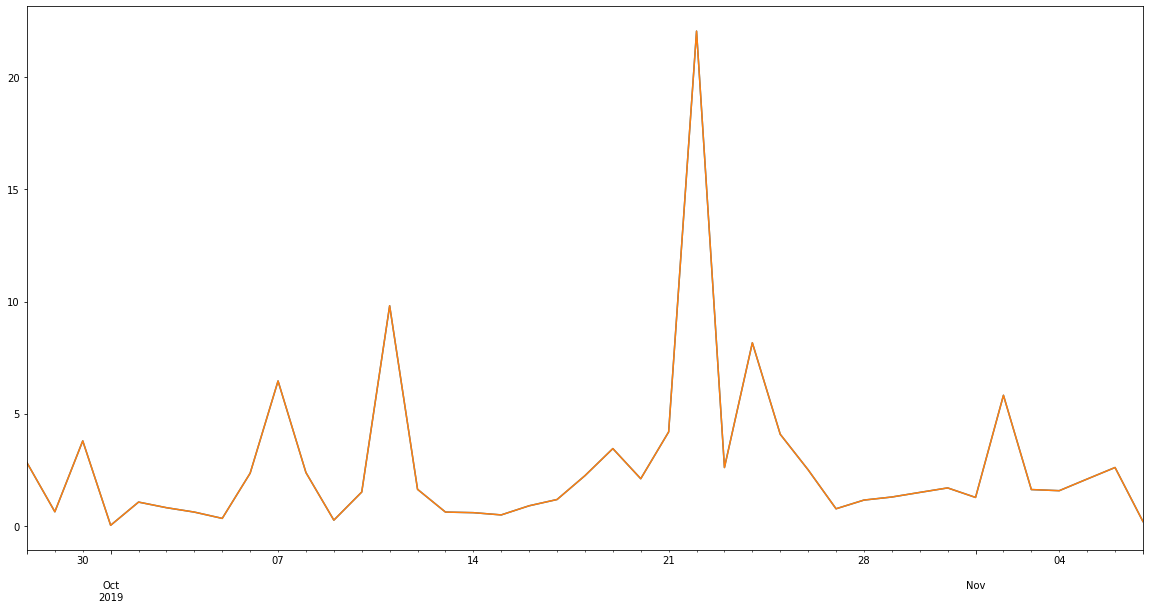

In [12]:
# Заполняем нулями пробелы
idx = pd.date_range(mean.index[0], mean.index[-1])
mean = mean.reindex(idx, fill_value=0)
mean[("response_time","mean")].plot(figsize=(20,10)).get_figure().savefig(f"fanta/moderation_delete_meantime.png")
mean[("response_time","mean")].plot(figsize=(20,10))
# df_stat[df_stat.index.get_level_values(1)=="wall_reply_new"].plot(figsize=(20,10))

## Расчет времени до ответа на комментарий

In [13]:
# Извлекам отправителя сообщения
df["from_id"] = df["object"].apply(lambda x: x.get('from_id',0))
# Фильтруем только сообщения от модератора, забираем дату и id сообщения на которое дан ответ 
df_rep = df[df.from_id == group_id]["object"].apply(pd.Series)[["from_id","date","reply_to_comment"]]
#  преаброзуем unixtime в datetime
df_rep["date"] = pd.to_datetime(df_rep["date"], unit='s')
# приводим индекс ответа к к reply_id 
df_rep.rename(columns={"reply_to_comment":"reply_id"}, inplace=True)
# Ищем сообщения с указанным в ответе reply_id
df_date = pd.merge(df_new, df_rep, on='reply_id')
# Расчитываем diff от момента создания до момоента ответа
df_date['response_time'] = (df_date.date_y - df_date.date_x).dt.seconds/60.0/60.0
# Сохраняем
df_date.to_csv("fanta/moderation_response_stat.csv", index=None)
# выводим
df_date


reply_id                     date_x   from_id              date_y  \
0      263524 2019-09-29 08:45:14.612536 -24539231 2019-09-29 10:25:08   
1      263527 2019-09-29 08:51:49.795747 -24539231 2019-09-29 10:26:03   
2      263528 2019-09-29 09:24:53.139219 -24539231 2019-09-29 10:23:35   
3      263534 2019-09-29 10:54:59.718837 -24539231 2019-09-29 12:02:26   
4      263539 2019-09-29 13:48:31.923808 -24539231 2019-09-29 15:24:17   
..        ...                        ...       ...                 ...   
329    265814 2019-11-06 17:13:17.665533 -24539231 2019-11-06 19:30:54   
330    265816 2019-11-06 17:50:55.760159 -24539231 2019-11-06 18:29:43   
331    265818 2019-11-06 18:25:38.003400 -24539231 2019-11-06 18:29:12   
332    265825 2019-11-06 20:36:41.177975 -24539231 2019-11-06 20:50:36   
333    265834 2019-11-07 13:20:14.999928 -24539231 2019-11-07 14:09:07   

     response_time  
0         1.664722  
1         1.570278  
2         0.978056  
3         1.123889  
4         1.595833  
..             ...  
329       2.293333  
330       0.646389  
331       0.059167  
332       0.231667  
333       0.814444  

[334 rows x 5 columns]

In [14]:
mean = (df_date[['date_x','response_time']]
 .groupby(df_date.date_x.dt.date)
 .agg(['count','mean', 'max','min']))
mean.to_csv("fanta/moderation_response_meantime.csv")
mean

response_time                                 
                   count       mean        max        min
date_x                                                   
2019-09-29             9   2.910309  17.188611   0.596111
2019-09-30             4   7.928750  21.863611   1.720556
2019-10-01             8   3.775625  10.535556   0.540556
2019-10-02            10   0.731167   3.130556   0.079167
2019-10-03             9   2.282716   4.780278   0.258056
2019-10-04             4   1.195833   2.793333   0.663333
2019-10-05             3   4.555556  10.355833   1.148333
2019-10-06             3   0.960185   1.357500   0.611667
2019-10-07            12   2.043449  11.253889   0.099444
2019-10-08             8   5.706424  18.895833   0.137778
2019-10-09            10   4.489083  22.314444   0.030833
2019-10-10             5   1.711944   4.049444   0.316389
2019-10-11             5  15.215444  22.857222  11.139444
2019-10-12            14   1.230159   2.660000   0.278889
2019-10-13            14   2.123790  11.101389   0.361667
2019-10-14             4   4.590694  14.281944   0.051389
2019-10-15             4   0.550972   1.141944   0.197500
2019-10-16             3   1.246296   3.079444   0.286111
2019-10-17             6   3.675417   9.498333   1.882500
2019-10-18             3   1.045741   1.967778   0.480278
2019-10-19             4   4.090694   5.430833   1.689167
2019-10-20             3   5.992685  12.615278   1.010278
2019-10-21             1  22.217222  22.217222  22.217222
2019-10-22             2   2.897083   3.923333   1.870833
2019-10-23             4   9.747222  14.165833   0.670278
2019-10-24             4   5.723125  17.348889   0.565000
2019-10-25            14   4.470496   8.549167   0.311944
2019-10-26            26   1.671667   5.871944   0.078333
2019-10-27            25   0.678956   2.994444   0.016944
2019-10-28            20   2.093875   8.240278   0.138611
2019-10-29            17   2.917941  10.130833   0.085556
2019-10-30            12   1.352755   6.969444   0.147500
2019-10-31            18   0.914306   4.248056   0.025000
2019-11-01             5   1.802500   2.660278   0.990556
2019-11-02             8   2.955972   8.075833   1.562500
2019-11-03             5   1.096833   1.841389   0.359167
2019-11-04            10   2.193056   5.026944   0.135000
2019-11-05            12   1.447778   4.158611   0.016389
2019-11-06             5   1.007056   2.293333   0.059167
2019-11-07             1   0.814444   0.814444   0.814444

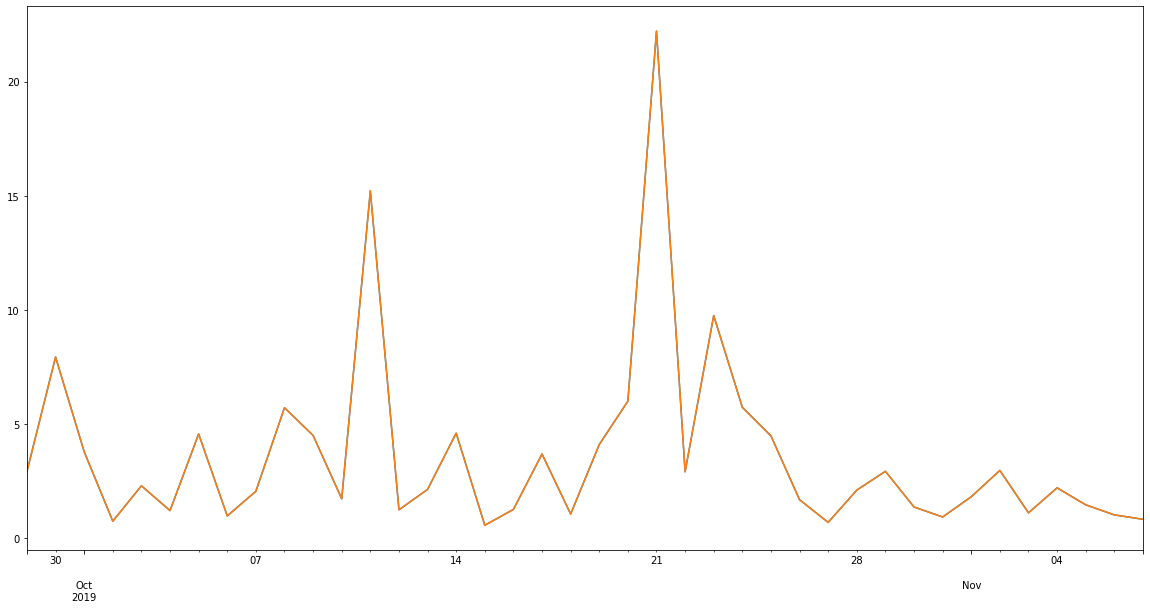

In [15]:
# Заполняем нулями пробелы
idx = pd.date_range(mean.index[0], mean.index[-1])
mean = mean.reindex(idx, fill_value=0)
mean[("response_time","mean")].plot(figsize=(20,10)).get_figure().savefig(f"fanta/moderation_response_meantime.png")
mean[("response_time","mean")].plot(figsize=(20,10))
# df_stat[df_stat.index.get_level_values(1)=="wall_reply_new"].plot(figsize=(20,10))

# Архивация отчета

In [17]:
%%bash
cp fanta.ipynb fanta/
rm fanta.zip
zip -9 -y -r -q fanta.(date +%F).zip fanta/

bash: line 3: syntax error near unexpected token `('
bash: line 3: `zip -9 -y -r -q fanta.(date +%F).zip fanta/'


CalledProcessError: Command 'b'cp fanta.ipynb fanta/\nrm fanta.zip\nzip -9 -y -r -q fanta.(date +%F).zip fanta/\n'' returned non-zero exit status 2.